In [33]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [34]:
df = pd.read_csv("time_series_covid19_recovered_global.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
pd.set_option('display.max_columns', None)
# Drop the null rows
df = df.dropna()
df.head(100)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,2,3,8,11,18,18,28,40,40,40,47,59,59,59,59,72,72,82,81,88,88,91,92,93,93,97,98,99,100,101,101,103,103,103
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,1379,1379,1379,1379,1755,1926,2006,2056,2193,2208,2227,2266,2284,2293,2293,2306
10,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,2,2,2,2,2,2,6,6,6,9,9,9,12,15,16,16,20,23,23,23,25,25,25,24,24
11,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,173,173,173,345,372,372,372,372,442,442,442,442,738,738,738,738,738,738,738,803,926,926,934,943,948,965,976
12,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,6,6,6,6,6,6,6,6,6,46,46,46,53,53,53,120,179,179,179,179,240,240,279,331,331,331,369,376,388,394,401,402,411,414,420,420,420,422,427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,British Virgin Islands,United Kingdom,18.4207,-64.6400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3
237,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,5,5,5,5,5,5
242,"Bonaire, Sint Eustatius and Saba",Netherlands,12.1784,-68.2385,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
244,Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,3,3,3,3,3,11,11,11,11,11,11,11,11,13,13


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 8 to 245
Columns: 106 entries, Province/State to 5/2/20
dtypes: float64(2), int64(102), object(2)
memory usage: 56.0+ KB


In [36]:
selected_features = df[['Province/State','Country/Region','Lat','Long',
                        '1/22/20','1/23/20','1/24/20','1/25/20','1/26/20','1/27/20','1/28/20',
                        '1/29/20','1/30/20','1/31/20','2/1/20','2/2/20','2/3/20','2/4/20','2/5/20','2/6/20','2/7/20','2/8/20','2/9/20','2/10/20','2/11/20','2/12/20','2/13/20','2/14/20',
                        '2/15/20','2/16/20','2/17/20','2/18/20','2/19/20','2/20/20','2/21/20','2/22/20','2/23/20',
                        '2/24/20','2/25/20','2/26/20','2/27/20','2/28/20','2/29/20','3/1/20','3/2/20','3/3/20','3/4/20',
                        '3/5/20','3/6/20','3/7/20','3/8/20','3/9/20','3/10/20','3/11/20','3/12/20','3/13/20','3/14/20',
                        '3/15/20','3/16/20','3/17/20','3/18/20','3/19/20','3/20/20','3/21/20','3/22/20','3/23/20','3/24/20',
                        '3/25/20','3/26/20','3/27/20','3/28/20','3/29/20','3/30/20','3/31/20','4/1/20','4/2/20','4/3/20',
                        '4/4/20','4/5/20','4/6/20','4/7/20','4/8/20','4/9/20','4/10/20','4/11/20','4/12/20','4/13/20',
                        '4/14/20','4/15/20','4/16/20','4/17/20','4/18/20','4/19/20','4/20/20','4/21/20','4/22/20','4/23/20',
                        '4/24/20','4/25/20','4/26/20','4/27/20','4/28/20','4/29/20','4/30/20','5/1/20','5/2/20']]
selected_features.head(20)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,2,3,8,11,18,18,28,40,40,40,47,59,59,59,59,72,72,82,81,88,88,91,92,93,93,97,98,99,100,101,101,103,103,103
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,1379,1379,1379,1379,1755,1926,2006,2056,2193,2208,2227,2266,2284,2293,2293,2306
10,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,2,2,2,2,2,2,6,6,6,9,9,9,12,15,16,16,20,23,23,23,25,25,25,24,24
11,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,173,173,173,345,372,372,372,372,442,442,442,442,738,738,738,738,738,738,738,803,926,926,934,943,948,965,976
12,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,6,6,6,6,6,6,6,6,6,46,46,46,53,53,53,120,179,179,179,179,240,240,279,331,331,331,369,376,388,394,401,402,411,414,420,420,420,422,427
13,Tasmania,Australia,-41.4545,145.9707,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3,5,5,5,5,5,5,5,5,5,26,26,26,48,48,48,48,48,53,53,67,67,67,67,71,74,77,91,106,117,123,132,137,144,153,157,158
14,Victoria,Australia,-37.8136,144.9631,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,8,70,70,97,97,149,171,191,191,191,291,343,422,476,527,573,620,620,620,736,926,926,926,926,1118,1118,1137,1159,1172,1172,1196,1202,1243,1251,1254,1262,1265,1280,1287,1291,1293,1300,1300
15,Western Australia,Australia,-31.9505,115.8605,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,28,28,41,41,48,64,92,92,92,162,162,162,170,203,216,216,216,251,251,338,340,340,340,435,443,451,458,464,478,486,486,495,507,507,511,520
40,Anhui,China,31.8257,117.2264,0,0,0,0,0,0,0,2,2,3,5,7,14,20,23,34,47,59,72,88,105,127,157,193,221,255,280,361,413,474,539,597,637,663,712,744,792,821,868,873,917,936,956,970,979,979,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,985,985,985,985,985,985,985,985,985
41,Beijing,China,40.1824,116.4142,0,0,1,2,2,2,4,4,4,5,9,9,12,23,24,31,33,34,37,44,48,56,69,80,98,108,114,122,145,153,169,178,189,198,215,235,248,257,271,276,282,288,297,297,299,303,308,315,320,326,334,342,349,353,360,369,378,380,390,396,400,400,401,403,406,408,410,412,415,418,418,424,434,438,441,443,448,455,464,469,474,479,484,491,495,503,509,509,510,514

In [37]:
data = selected_features.copy()

data_binary_encoded = pd.get_dummies(selected_features)
data_binary_encoded.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,Province/State_Anguilla,Province/State_Anhui,Province/State_Aruba,Province/State_Australian Capital Territory,Province/State_Beijing,Province/State_Bermuda,"Province/State_Bonaire, Sint Eustatius and Saba",Province/State_British Virgin Islands,Province/State_Cayman Islands,Province/State_Channel Islands,Province/State_Chongqing,Province/State_Curacao,Province/State_Falkland Islands (Malvinas),Province/State_Faroe Islands,Province/State_French Guiana,Province/State_French Polynesia,Province/State_Fujian,Province/State_Gansu,Province/State_Gibraltar,Province/State_Greenland,Province/State_Guadeloupe,Province/State_Guangdong,Province/State_Guangxi,Province/State_Guizhou,Province/State_Hainan,Province/State_Hebei,Province/State_Heilongjiang,Province/State_Henan,Province/State_Hong Kong,Province/State_Hubei,Province/State_Hunan,Province/State_Inner Mongolia,Province/State_Isle of Man,Province/State_Jiangsu,Province/State_Jiangxi,Province/State_Jilin,Province/State_Liaoning,Province/State_Macau,Province/State_Martinique,Province/State_Mayotte,Province/State_Montserrat,Province/State_New Caledonia,Province/State_New South Wales,Province/State_Ningxia,Province/State_Northern Territory,Province/State_Qinghai,Province/State_Queensland,Province/State_Reunion,Province/State_Saint Barthelemy,Province/State_Saint Pierre and Miquelon,Province/State_Shaanxi,Province/State_Shandong,Province/State_Shanghai,Province/State_Shanxi,Province/State_Sichuan,Province/State_Sint Maarten,Province/State_South Australia,Province/State_St Martin,Province/State_Tasmania,Province/State_Tianjin,Province/State_Tibet,Province/State_Turks and Caicos Islands,Province/State_Victoria,Province/State_Western Australia,Province/State_Xinjiang,Province/State_Yunnan,Province/State_Zhejiang,Country/Region_Australia,Country/Region_China,Country/Region_Denmark,Country/Region_France,Country/Region_Netherlands,Country/Region_United Kingdom
8,-35.4735,149.0124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,2,3,8,11,18,18,28,40,40,40,47,59,59,59,59,72,72,82,81,88,88,91,92,93,93,97,98,99,100,101,101,103,103,103,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9,-33.8688,151.2093,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,1379,1379,1379,1379,1755,1926,2006,2056,2193,2208,2227,2266,2284,2293,2293,2306,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
10,-12.4634,130.8456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,2,2,2,2,2,2,6,6,6,9,9,9,12,15,16,16,20,23,23,23,25,25,25,24,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
11,-28.0167,153.4000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [38]:
dummies_features = data_binary_encoded[['Lat','Long',
                        '1/22/20','1/23/20','1/24/20','1/25/20','1/26/20','1/27/20','1/28/20',
                        '1/29/20','1/30/20','1/31/20','2/1/20','2/2/20','2/3/20','2/4/20','2/5/20','2/6/20','2/7/20','2/8/20','2/9/20','2/10/20','2/11/20','2/12/20','2/13/20','2/14/20',
                        '2/15/20','2/16/20','2/17/20','2/18/20','2/19/20','2/20/20','2/21/20','2/22/20','2/23/20',
                        '2/24/20','2/25/20','2/26/20','2/27/20','2/28/20','2/29/20','3/1/20','3/2/20','3/3/20','3/4/20',
                        '3/5/20','3/6/20','3/7/20','3/8/20','3/9/20','3/10/20','3/11/20','3/12/20','3/13/20','3/14/20',
                        '3/15/20','3/16/20','3/17/20','3/18/20','3/19/20','3/20/20','3/21/20','3/22/20','3/23/20','3/24/20',
                        '3/25/20','3/26/20','3/27/20','3/28/20','3/29/20','3/30/20','3/31/20','4/1/20','4/2/20','4/3/20',
                        '4/4/20','4/5/20','4/6/20','4/7/20','4/8/20','4/9/20','4/10/20','4/11/20','4/12/20','4/13/20',
                        '4/14/20','4/15/20','4/16/20','4/17/20','4/18/20','4/19/20','4/20/20','4/21/20','4/22/20','4/23/20',
                        '4/24/20','4/25/20','4/26/20','4/27/20','4/28/20','4/29/20','4/30/20','5/1/20','5/2/20']]
dummies_features.head(20)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20
8,-35.4735,149.0124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,2,3,8,11,18,18,28,40,40,40,47,59,59,59,59,72,72,82,81,88,88,91,92,93,93,97,98,99,100,101,101,103,103,103
9,-33.8688,151.2093,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,1379,1379,1379,1379,1755,1926,2006,2056,2193,2208,2227,2266,2284,2293,2293,2306
10,-12.4634,130.8456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,2,2,2,2,2,2,6,6,6,9,9,9,12,15,16,16,20,23,23,23,25,25,25,24,24
11,-28.0167,153.4000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,173,173,173,345,372,372,372,372,442,442,442,442,738,738,738,738,738,738,738,803,926,926,934,943,948,965,976
12,-34.9285,138.6007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,6,6,6,6,6,6,6,6,6,46,46,46,53,53,53,120,179,179,179,179,240,240,279,331,331,331,369,376,388,394,401,402,411,414,420,420,420,422,427
13,-41.4545,145.9707,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3,5,5,5,5,5,5,5,5,5,26,26,26,48,48,48,48,48,53,53,67,67,67,67,71,74,77,91,106,117,123,132,137,144,153,157,158
14,-37.8136,144.9631,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,8,70,70,97,97,149,171,191,191,191,291,343,422,476,527,573,620,620,620,736,926,926,926,926,1118,1118,1137,1159,1172,1172,1196,1202,1243,1251,1254,1262,1265,1280,1287,1291,1293,1300,1300
15,-31.9505,115.8605,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,28,28,41,41,48,64,92,92,92,162,162,162,170,203,216,216,216,251,251,338,340,340,340,435,443,451,458,464,478,486,486,495,507,507,511,520
40,31.8257,117.2264,0,0,0,0,0,0,0,2,2,3,5,7,14,20,23,34,47,59,72,88,105,127,157,193,221,255,280,361,413,474,539,597,637,663,712,744,792,821,868,873,917,936,956,970,979,979,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,984,985,985,985,985,985,985,985,985,985
41,40.1824,116.4142,0,0,1,2,2,2,4,4,4,5,9,9,12,23,24,31,33,34,37,44,48,56,69,80,98,108,114,122,145,153,169,178,189,198,215,235,248,257,271,276,282,288,297,297,299,303,308,315,320,326,334,342,349,353,360,369,378,380,390,396,400,400,401,403,406,408,410,412,415,418,418,424,434,438,441,443,448,455,464,469,474,479,484,491,495,503,509,509,510,514,516,518,524,525,525,525,536,538,542,547,547,547


In [39]:
# get X and y variables
y = df["Country/Region"]
X = dummies_features

In [40]:
# split the data to train and test values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [41]:
X_train.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20
15,-31.9505,115.8605,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,28,28,41,41,48,64,92,92,92,162,162,162,170,203,216,216,216,251,251,338,340,340,340,435,443,451,458,464,478,486,486,495,507,507,511,520
83,61.8926,-6.9118,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33,38,47,54,54,70,70,74,75,81,91,93,99,107,120,131,136,145,145,157,157,163,166,169,171,173,176,176,178,178,178,178,178,178,178,181,181,184,184,184
62,35.7452,95.9956,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,3,5,9,11,11,13,13,13,15,16,16,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
165,18.0425,-63.0548,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,6,6,6,1,1,1,1,1,3,5,5,5,5,5,12,12,12,12,12,12,22,22,22,22,33,33,33,33,33,44,44
51,33.8820,113.6140,0,0,0,0,0,0,0,1,2,3,3,10,16,27,47,56,86,116,153,191,218,246,296,357,391,440,509,522,573,637,736,830,868,943,1002,1033,1068,1112,1170,1198,1205,1231,1234,1239,1244,1244,1247,1247,1247,1249,1249,1249,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1251,1251,1251,1251,1251,1251,1251,1251,1251,1252,1252,1252,1252,1252,1252,1253,1253,1254,1254,1254,1254,1254,1254,1254,1254,1254,1254,1254,1254,1254,1254,1254,1254,1254,1254,1254


In [42]:
# Import dependencies
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler
from tensorflow.keras.utils import to_categorical

# scale the data
X_scaler =  StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)


print(encoded_y_test)

[1 1 0 1 3 1 5 0 4 1 1 5 1 0 5 1 3]


In [43]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_scaled, encoded_y_train)
predictions = model.predict(X_test_scaled)
model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [44]:
print(f"Training Data Score: {model.score(X_train_scaled, encoded_y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, encoded_y_test)}")

Training Data Score: 0.8
Testing Data Score: 0.8235294117647058


In [45]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(encoded_y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         8
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.60      1.00      0.75         3

    accuracy                           0.82        17
   macro avg       0.47      0.60      0.52        17
weighted avg       0.71      0.82      0.75        17



C:\Users\bthom\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [46]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [47]:
# Train the model with GridSearch
grid.fit(X_train_scaled, encoded_y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.600, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.800, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.700, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.700, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.600, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.600, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...........

C:\Users\bthom\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [48]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 5, 'gamma': 0.0001}
0.7400000000000001


In [49]:
import joblib
filename = 'FinalProject5_recoveryGlobal_model.sav'
joblib.dump(model, filename)

['FinalProject5_recoveryGlobal_model.sav']

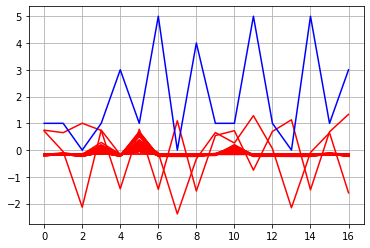

In [50]:

plt.grid(True)
plt.plot(X_test_scaled, color = "red")
plt.plot(encoded_y_test, color = "blue")
plt.show()

No handles with labels found to put in legend.


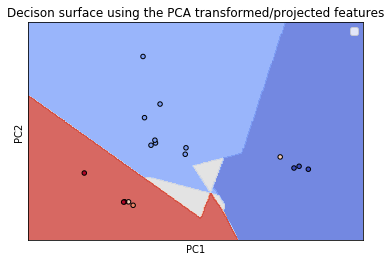

In [51]:
from sklearn.svm import SVC
import numpy as np

from sklearn import svm
from sklearn.decomposition import PCA

X = (X_test_scaled)
y = (encoded_y_test)

pca = PCA(n_components=2)
Xreduced = pca.fit_transform(X)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = svm.SVC(kernel='linear')
clf = model.fit(Xreduced, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = Xreduced[:, 0], Xreduced[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Decison surface using the PCA transformed/projected features')
ax.legend()
plt.show()


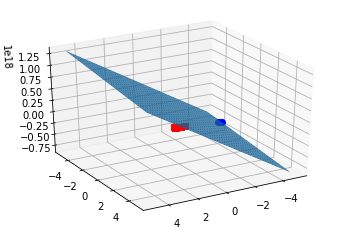

In [52]:
from mpl_toolkits.mplot3d import Axes3D

X = (X_test_scaled[:, :3])
Y = (encoded_y_test)
#X = iris.data[:, :3]  # we only take the first three features.
#Y = iris.target

#make it binary classification problem
X = X[np.logical_or(Y==0,Y==1)]
Y = Y[np.logical_or(Y==0,Y==1)]

model = svm.SVC(kernel='linear')
clf = model.fit(X, Y)

# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]

tmp = np.linspace(-5,5,30)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
ax.plot_surface(x, y, z(x,y))
ax.view_init(30, 60)
plt.show()

In [53]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
# fit the data and make predictions
model.fit(X_train_scaled, encoded_y_train)
predictions = model.predict(X_test_scaled)
predictions

array([1, 1, 0, 1, 5, 1, 5, 0, 5, 1, 1, 1, 1, 0, 5, 1, 0])

In [55]:
print(f"Training Data Score: {model.score(X_train_scaled, encoded_y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, encoded_y_test)}")

Training Data Score: 0.78
Testing Data Score: 0.7647058823529411


In [56]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(encoded_y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.89      1.00      0.94         8
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.50      0.67      0.57         3

    accuracy                           0.76        17
   macro avg       0.43      0.53      0.47        17
weighted avg       0.64      0.76      0.70        17



C:\Users\bthom\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [57]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [10, 50, 100],
             'max_iter':[200, 500, 1000]}
grid = GridSearchCV(model,param_grid, verbose=3)

In [58]:
# Train the model with GridSearch
grid.fit(X_train_scaled, encoded_y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=10, max_iter=200 ..............................................
[CV] .................. C=10, max_iter=200, score=0.800, total=   0.0s
[CV] C=10, max_iter=200 ..............................................
[CV] .................. C=10, max_iter=200, score=0.900, total=   0.0s
[CV] C=10, max_iter=200 ..............................................
[CV] .................. C=10, max_iter=200, score=0.800, total=   0.0s
[CV] C=10, max_iter=200 ..............................................
[CV] .................. C=10, max_iter=200, score=0.700, total=   0.0s
[CV] C=10, max_iter=200 ..............................................
[CV] .................. C=10, max_iter=200, score=0.600, total=   0.0s
[CV] C=10, max_iter=500 ..............................................
[CV] .................. C=10, max_iter=500, score=0.800, total=   0.0s
[CV] C=10, max_iter=500 ..............................................
[CV] ............

C:\Users\bthom\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................. C=10, max_iter=500, score=0.800, total=   0.0s
[CV] C=10, max_iter=500 ..............................................
[CV] .................. C=10, max_iter=500, score=0.700, total=   0.0s
[CV] C=10, max_iter=500 ..............................................
[CV] .................. C=10, max_iter=500, score=0.600, total=   0.0s
[CV] C=10, max_iter=1000 .............................................
[CV] ................. C=10, max_iter=1000, score=0.800, total=   0.0s
[CV] C=10, max_iter=1000 .............................................
[CV] ................. C=10, max_iter=1000, score=0.900, total=   0.0s
[CV] C=10, max_iter=1000 .............................................
[CV] ................. C=10, max_iter=1000, score=0.800, total=   0.0s
[CV] C=10, max_iter=1000 .............................................
[CV] ................. C=10, max_iter=1000, score=0.700, total=   0.0s
[CV] C=10, max_iter=1000 .............................................
[CV] .

C:\Users\bthom\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\bthom\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\bthom\Anaconda3\lib\site-packages

[CV] ................. C=100, max_iter=200, score=0.700, total=   0.1s
[CV] C=100, max_iter=200 .............................................
[CV] ................. C=100, max_iter=200, score=0.600, total=   0.0s
[CV] C=100, max_iter=500 .............................................
[CV] ................. C=100, max_iter=500, score=0.800, total=   0.1s
[CV] C=100, max_iter=500 .............................................
[CV] ................. C=100, max_iter=500, score=0.900, total=   0.1s
[CV] C=100, max_iter=500 .............................................
[CV] ................. C=100, max_iter=500, score=0.800, total=   0.1s
[CV] C=100, max_iter=500 .............................................
[CV] ................. C=100, max_iter=500, score=0.700, total=   0.0s
[CV] C=100, max_iter=500 .............................................
[CV] ................. C=100, max_iter=500, score=0.600, total=   0.0s
[CV] C=100, max_iter=1000 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [10, 50, 100], 'max_iter': [200, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [59]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 10, 'max_iter': 200}
0.76
